In [1]:
%matplotlib nbagg
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


import session_info
session_info.show(html=False)

-----
matplotlib          3.7.1
numpy               1.23.5
pandas              2.0.1
seaborn             0.12.2
session_info        1.0.0
sklearn             1.0.2
-----
IPython             8.13.2
jupyter_client      6.1.12
jupyter_core        4.9.2
jupyterlab          3.3.2
notebook            6.4.8
-----
Python 3.9.7 (default, Sep 16 2021, 13:09:58) [GCC 7.5.0]
Linux-5.10.0-21-amd64-x86_64-with-glibc2.31
-----
Session information updated at 2023-05-29 11:27


### Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

- CRIM      per capita crime rate by town
- ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS     proportion of non-retail business acres per town
- CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX       nitric oxides concentration (parts per 10 million)
- RM        average number of rooms per dwelling
- AGE       proportion of owner-occupied units built prior to 1940
- DIS       weighted distances to five Boston employment centres
- RAD       index of accessibility to radial highways
- TAX      full-value property-tax rate per $\$$ 10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $\$$ 1000's

Llegim el dataset i donem noms a les columnes. Comprovem que no hi ha valors nuls i es mostren les cinc primeres observacions.
Hem transformat la variable *dummie* en categòrica per tal de no incluir-la en els anàlisis numèrics.

In [2]:
df = pd.read_csv('housing data.csv', names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                                            'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
df['CHAS'] = df['CHAS'].astype('category')
print(df.isna().value_counts())

df.head()

CRIM   ZN     INDUS  CHAS   NOX    RM     AGE    DIS    RAD    TAX    PTRATIO  B      LSTAT  MEDV 
False  False  False  False  False  False  False  False  False  False  False    False  False  False    506
Name: count, dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Anem a separar les dades amb la funció *train_test_split* de la llibreria *sklearn*. Dividirem entr 70 i 30 percent la part d'entrenament i la de test. A seguir mostrem el tamany de cada nou df. S'ha determinat una llavor (random_state) per tal de fer-ho reproduible.

In [3]:
#from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3,random_state=20)

print(len(train))
print(len(test))

354
152


Com exigit a l'exercíci, analitzarem a nivell descriptiu les dades per separat. Cada passa serà feta primer pel conjunt de dades *train* primer i pel conjunt *test* després. També serà interessant comparar-los per tal d'entendre millor la partició de dades.

In [4]:
train.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.419298,11.896893,11.266893,0.551821,6.273791,67.504802,3.813478,9.344633,407.841808,18.371186,356.646243,12.616158,22.684746
std,7.622903,23.295459,7.022038,0.115525,0.728552,29.073260,2.130454,8.556421,166.598916,2.156436,89.859013,7.374923,9.175592
min,0.006320,0.000000,1.220000,0.385000,3.561000,2.900000,1.137000,1.000000,188.000000,12.600000,2.600000,1.730000,5.000000
25%,0.083278,0.000000,5.190000,0.447250,5.874250,41.600000,2.047600,4.000000,279.000000,17.000000,373.297500,6.777500,17.100000
50%,0.256510,0.000000,9.690000,0.538000,6.210000,76.800000,3.272100,5.000000,335.000000,18.700000,391.250000,11.170000,21.400000
75%,3.221788,20.000000,18.100000,0.624000,6.605500,94.325000,5.213925,8.000000,666.000000,20.200000,395.975000,16.635000,26.350000
max,67.920800,100.000000,27.740000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
test.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,4.065864,10.121711,10.833750,0.561388,6.309888,71.067105,3.752108,10.026316,409.157895,18.651974,356.738750,12.739013,22.178947
std,10.549918,23.414986,6.480489,0.116804,0.639728,25.787814,2.053214,9.059734,173.522795,2.179099,94.857869,6.586791,9.267722
min,0.009060,0.000000,0.460000,0.392000,4.138000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,2.880000,5.000000
25%,0.068470,0.000000,5.130000,0.467750,5.955000,54.125000,2.169825,4.000000,281.000000,17.400000,376.745000,7.482500,16.750000
50%,0.262475,0.000000,8.560000,0.538000,6.190000,79.450000,3.107300,5.000000,312.000000,19.600000,392.190000,11.855000,20.750000
75%,4.568162,0.000000,18.100000,0.655000,6.650000,93.925000,5.104800,24.000000,666.000000,20.200000,396.900000,17.267500,23.925000
max,88.976200,95.000000,25.650000,0.871000,8.704000,100.000000,12.126500,24.000000,666.000000,22.000000,396.900000,30.590000,50.000000


In [6]:
print('Ratio de les mitjanes per cada una de les variables')
print(train.mean(numeric_only=True)/test.mean(numeric_only=True))
print('')
print('Ratio de les desviacions per cada una de les variables')
print(train.std(numeric_only=True)/test.std(numeric_only=True))

Ratio de les mitjanes per cada una de les variables
CRIM       0.840977
ZN         1.175384
INDUS      1.039981
NOX        0.982960
RM         0.994279
AGE        0.949874
DIS        1.016356
RAD        0.932011
TAX        0.996783
PTRATIO    0.984946
B          0.999741
LSTAT      0.990356
MEDV       1.022805
dtype: float64

Ratio de les desviacions per cada una de les variables
CRIM       0.722556
ZN         0.994895
INDUS      1.083566
NOX        0.989048
RM         1.138847
AGE        1.127403
DIS        1.037619
RAD        0.944445
TAX        0.960098
PTRATIO    0.989600
B          0.947302
LSTAT      1.119653
MEDV       0.990059
dtype: float64


Hem apresentat la descripció bàsica de dades, la mitjana, els quartils i els valors mínims i màxims. També hem obtingut els ratios entre el *train* i *test* per verificar si les mitjanes i les desviacions padró són semblants. Quant més pròxim de 1 més similar. Una de les variables mitjes més allunyades és la de crims, tan per la mitja com pel desviament padró. A seguir, hem aplicat el T-test comprovant que, tot i la diferència, estatatísticament, les dades són de la mateixa distribució.

In [7]:
from scipy.stats import ttest_ind
data1 = train['CRIM']
data2 = test['CRIM']
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
print('variance of data1 is {}'.format(np.var(data1)))
print('variance of data2 is {}'.format(np.var(data2)))

stat=-0.775, p=0.439
Probably the same distribution
variance of data1 is 57.94449392774301
variance of data2 is 110.56852599247338


### Distribucions de les variables

Mostrem dues figures per les distribucions de cada una de les variables, una pel dataset *train* i l'altre pel *test*. Farem el mateix per verificar les correlacions entre les variables mitjançant dos *heatmaps* i finalment *boxplots* per tal de veure el *outliers*

<IPython.core.display.Javascript object>


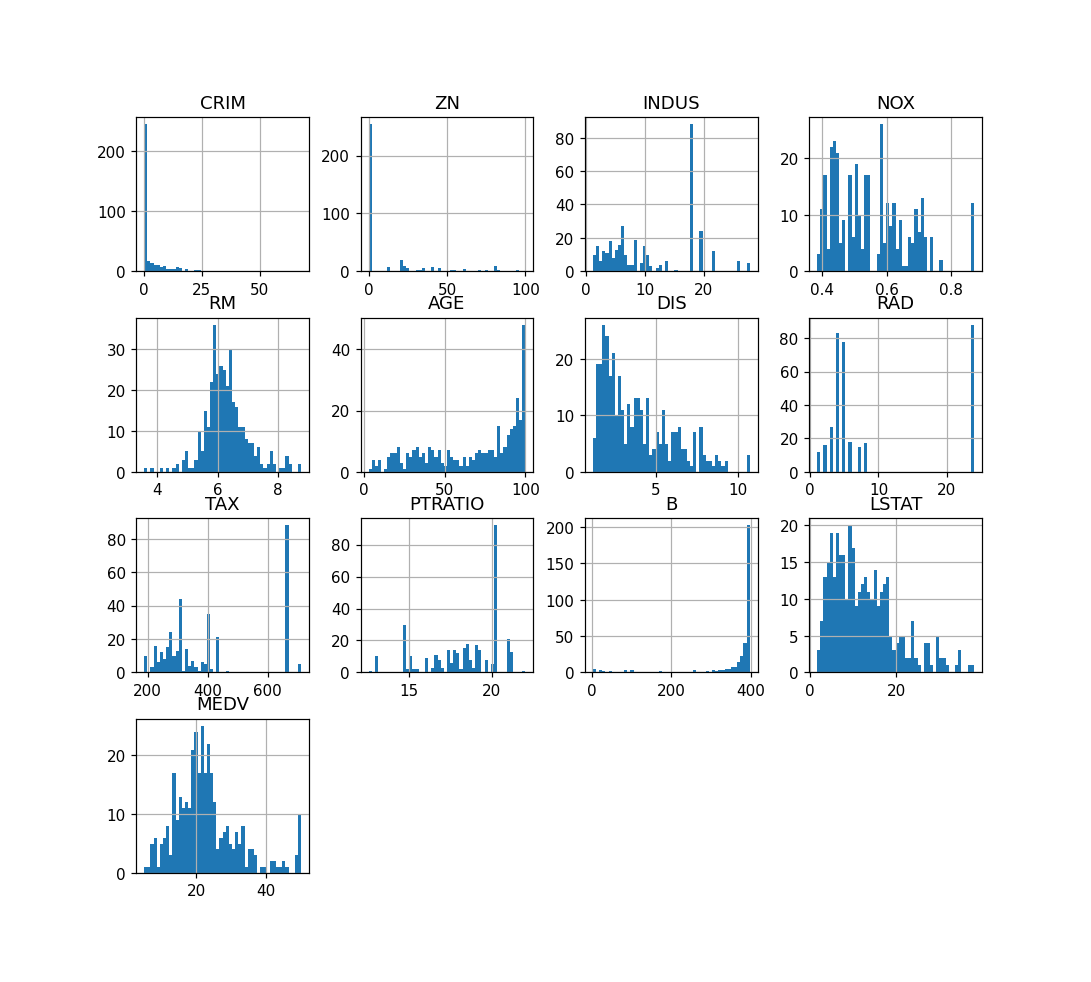

In [8]:
train.hist(bins=50, figsize=(10,9))
plt.show()

<IPython.core.display.Javascript object>


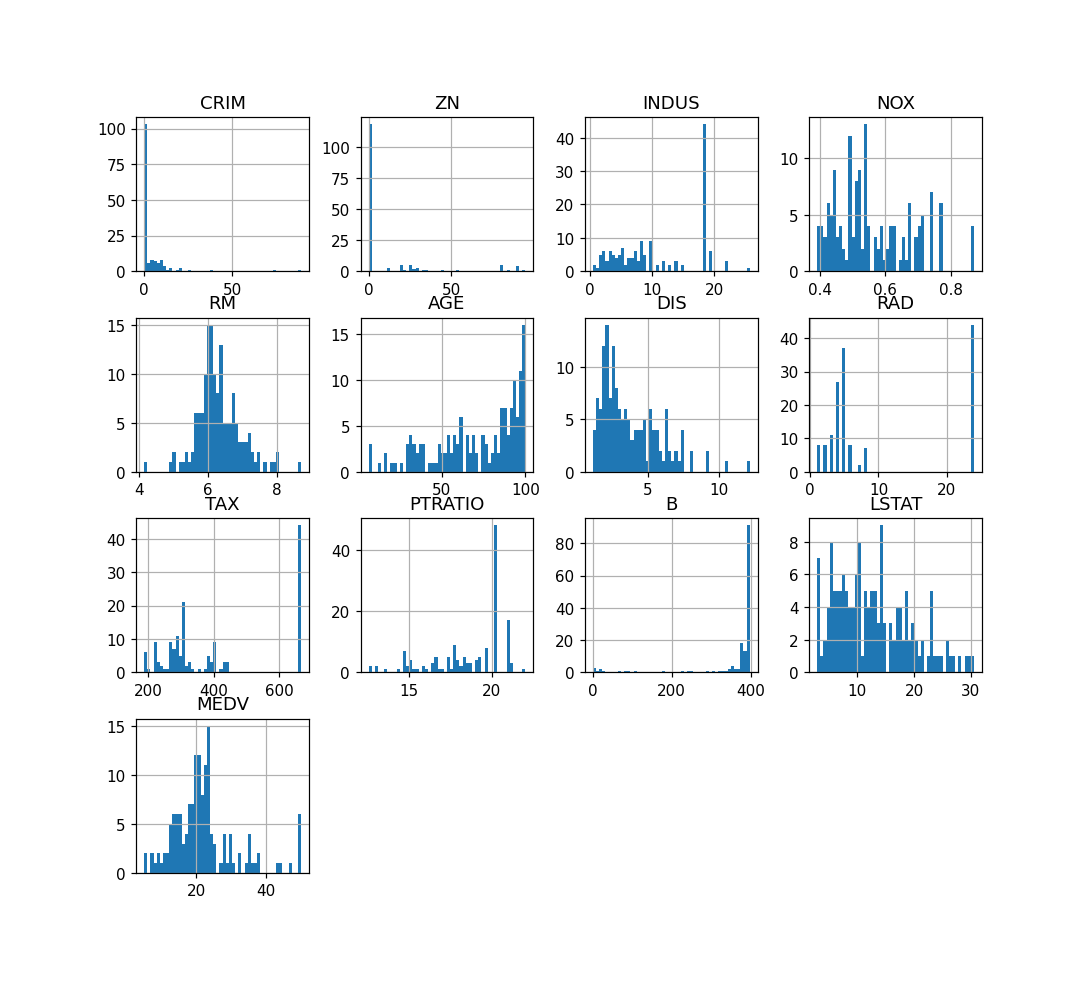

In [9]:
test.hist(bins=50, figsize=(10,9))
plt.show()

Les distribucions són semblants entre *train* i *test*. Observem que per CRIMS, la distribució està molt cap a l'esquerra, índex de criminalitat baix, pràcticament a la inversa de la distribució de B, que mesura la proporció de negres per poble. Aquestes correlacions le veurem millor en les figures a seguir. distribucions com AGE, proporció d'unitats ocupades pel propietari construïdes abans de 1940, i DIST distància de la propietat fins a cinc centres d'activitat econòmica de Boston estàn acumulades a esquerra i dreta respectivament. Altres distribucions com TAX, ZN o INDUS tenen bins molt per sobre dels altres valors, veurem si aquests són outliers.
Finalment, el nombre d'habitacions mitjà per habitatge (RM) o el valor mitjà en 1000s dòllars (MEDV) sembla que estàn distribuides normalment. Ho verificarem aplicant el test de normalitat Shapiro, però en els dos casos caiem en la zona de rejecció. No són distribucions normals.

In [10]:
from scipy.stats import shapiro
data = train['RM']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3E' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.960, p=2.938E-08
Probably not Gaussian


In [11]:
from scipy.stats import shapiro
data = train['MEDV']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3E' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.925, p=2.619E-12
Probably not Gaussian


<IPython.core.display.Javascript object>


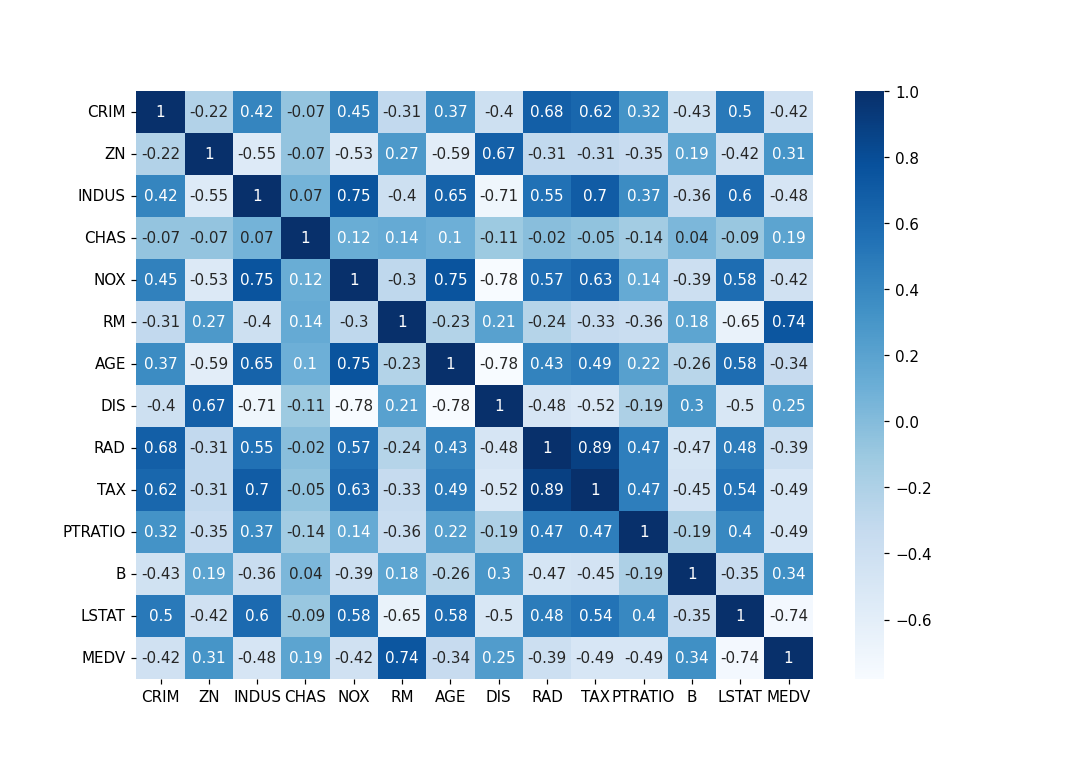

<Axes: >

In [12]:
fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(train.corr().round(2), cmap='Blues', annot=True)


<IPython.core.display.Javascript object>


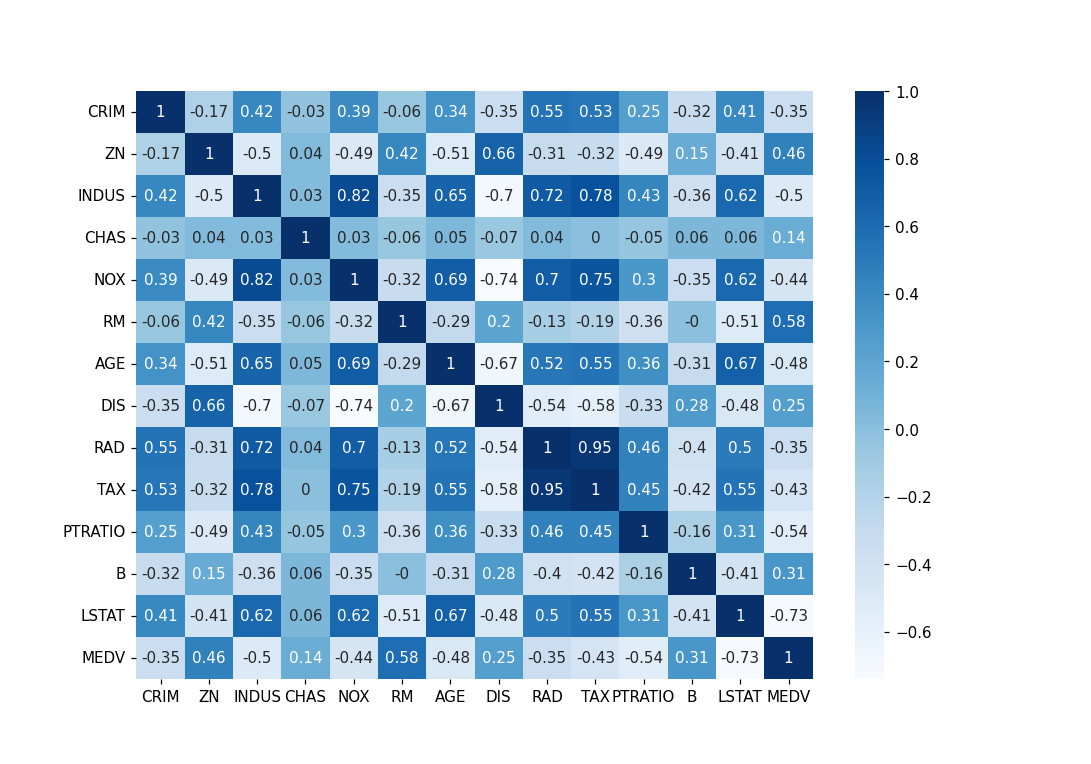

<Axes: >

In [13]:
fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(test.corr().round(2), cmap='Blues', annot=True)


Comentarem algunes de les correlacions més altes que trobem en el conjunt de dades i que poden ser interessants per aprofundir-hi.

- INDUS-CRIM: tot i tenir una correlació moderada (R=0.42) seria interessant verificar aquesta relació entre index de criminalitat i zones destinades  a la indústria.

- NOX-INDUS: una correlació alta (0.82) entre concentració d'òxids nítrics i zones industrials. Sembla coherent.

- AGE-ZN: Correlació moderada. Proporció d'unitats ocupades abans de 1940 i  proporció de terres residencials per lots per sobre de 25000 peus quadrats. Potser caldria un històric de ZN per entendre aquesta anticorrelació ja que AGE considera unitats construides abans de 1940.

- AGE-INDUS: correlació de 0.65. Es construia més a prop de les zones dedicades a la indústria abans de 1940? O potser s'han donat més permissos per zones dedicades a la indústria després de 1940? A vegades cal entendre o consultar experts en el tema d'estudi per tal d'entendre si una correlació té o no sentit.

- AGE-NOX: correlació de 0.69. Corrobora la correlació entre AGE-INDUS i la de INDUS-NOX.

- DIS-ZN: correlació 0.66 entre zones residencials i distàncies d'aquestes a cinc punts importants d'activitat econòmica a Boston.

- DIS-NOX: anticorrelació important (-0.74). Quant més allunyada la població de les zones d'activitat econòmica, menys concentració de òxids nítics.

- DIS-AGE: anticorrelació (-0.67). Corrobora la correlació AGE-INDUS comentada anteriorment. En aquest cas és negativa ja que la distància disminueix.

- RAD-INDUS: correlació de 0.72. Quant més activitat industrial millors accessos. Coherent.

- RAD-NOX: Seguint la mateixa lògica que l'anterior, lligant accessos, indústria i contaminació.

- TAX-CRIM: correlació de 0.53. Tot i ser moderada és interessant. On es paguen més impostos atrau més criminalitat?

- TAX-INDUS: 0.78 de correlació. Indica que es paguen més impostos en regions industrials.

- TAX-NOX: 0.75 de correlació. Seguint la mateixa lògica que la inmediatament comentada ja que INDUS-NOX es correlacionen positivament.

- TAX-RAD: correlació de 0.95. Molt alta, sembla que els accessos es paguen.

- LSTAT-INDUS: correlació de 0.62. Una relació interessant per analitzar. Persones de baix status viuen més a prop de la indústria?

- LSTAT-AGE: R=0.67. Persones de baix status viuen en cases més velles?

- B-CRIM: Havíem comentat aquesta relació en les distribucions. Hi ha una correlació negativa moderada. Quant més baix és l'index B, més alt la proporció de negres. És important també conèixer la cultura d'ón provenen les dades per tal d'entendre-les millor.








#### Boxplots

Com que les dades són una mica diferents per cada una de les variables i estem fent un anàlisis general, normalitzarem les dades per tal de poder posar totes les variables en un mateix gràfic. Aquesta normalització és part de l'exercici 2.

In [14]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
train_minmax = min_max_scaler.fit_transform(train)


from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
test_minmax = min_max_scaler.fit_transform(test)

# Tornem a transformar en df per tal de fer els gràfics.
df_train_norm = pd.DataFrame(train_minmax, columns=train.columns)
df_test_norm = pd.DataFrame(test_minmax, columns=test.columns)

<IPython.core.display.Javascript object>


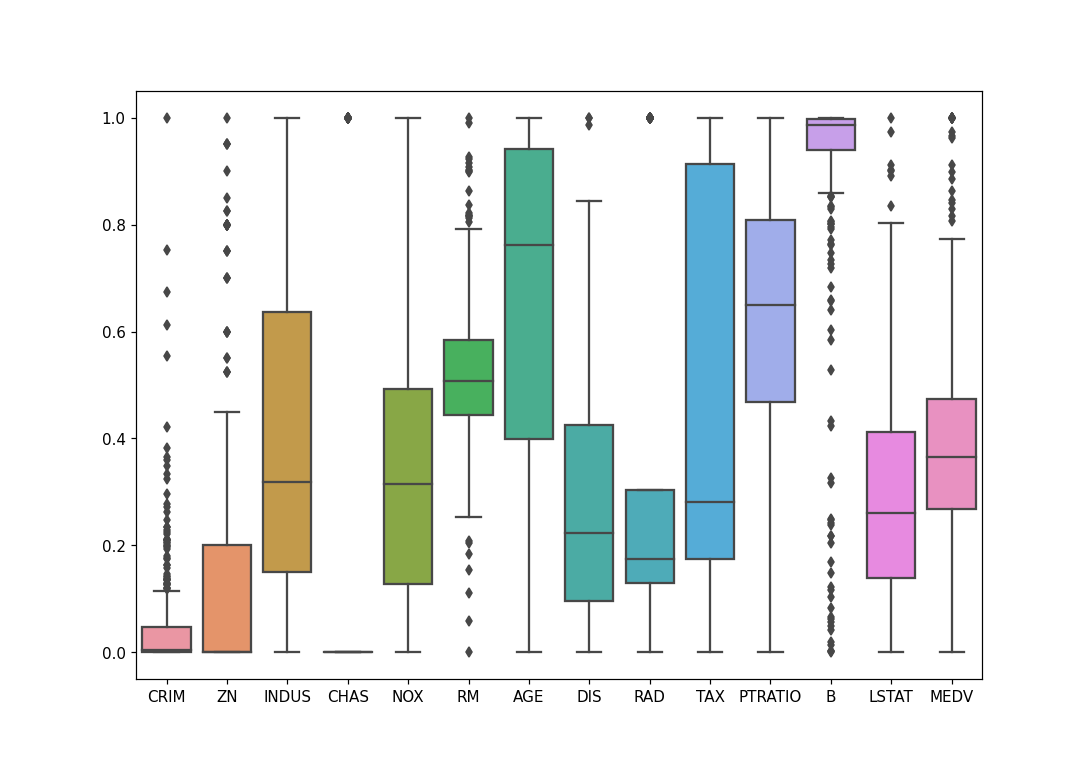

<Axes: >

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(df_train_norm)

<IPython.core.display.Javascript object>


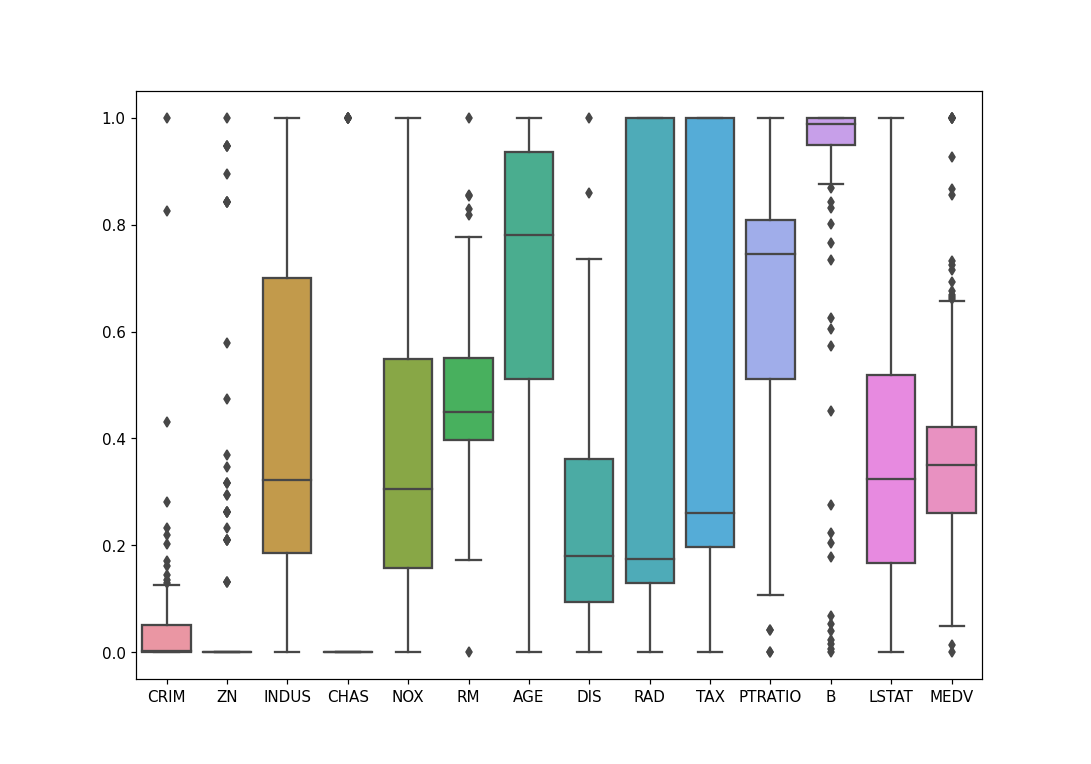

<Axes: >

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(df_test_norm)

Observem en ambdós casos que hi ha algunes variables amb bastants *outliers*. CRIM, ZN en tenen molts per sobre del seu quart quartil i B molts per sota el primer quartil. Coneixent bé les dades podem pendre la decisió de excluir o no els *outliers*. També depenem de la qualitat metedològica amb que aquestes dades han estat recollides.
En el cas de CRIM no els descartaria, ja que pot voler dir que, tot i que l'index de criminalitat és baix, hi ha punts aïllats que és considerable. De la mateixa manera, però a la inversa, la variable B ens indica que certes poblacions amb proporció més alta de negres també són importants encara que no generalitzades. Coneixent el territori podriem indicar si són guetos o algún altre tipus de fenòmen.

CHAS és una variable *dummy* per això només hi ha les observacions en 0 i 1.

###  Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

En l'última part de l'exercíci 1 hem estandaritzat les dades per poder comparar els boxplots de tot el dataset. 
En aquest exercíci generarem noves columnes categòriques a partir de les dades i en l'exercíci 3 en farem l'anàlisis.

Generarem noves columnes categòriques a partir de les columnes existents CRIM, NOX, DIS i AGE. Per fer-ho, dividirem les dades numèriques en tres quartils utlitzant la funció de pandas *qcut* i etiquetant-les amb les categories *baix, mig, alt* depenent de les variables. 

És interessant remarcar que aquesta divisió no necessariamrnt és la més adequada. Un coneixement més profund de les dades, i amb objectius de recerca més clar es poden fer altres divisions més orientades als objectius.

In [17]:
df["CRIM_cat"] = pd.qcut(df["CRIM"], q=3,
                        labels=['baix', 'mig', 'alt'])

df["NOX_cat"] = pd.qcut(df["NOX"], q=3,
                        labels=['baixa', 'mitjana', 'alta'])

df["DIS_cat"] = pd.qcut(df["DIS"], q=3,
                        labels=['prop', 'mitj', 'lluny'])

df["AGE_cat"] = pd.qcut(df["AGE"], q=3,
                        labels=['baixa', 'mitjana', 'alta'])

També generem *dummies* a partir de les columnes categòriques implementades anteriorment (CRIM_cat, NOX_cat, DIS_cat, AGE_cat) i en mostrem, de CRIM i DIS per veure si han estat generades correctament. La funció *get dummies* retorna True o False per defecte, on True és igual a 1 i False igual a 0. S'ha utilitzat la opció *dtype* per tal de mostrar directamnet el resultat com a *int*. 

Com que aquestes dummies han estat generades a partir de dades categòriques obtingudes per quartils, esperem trobar un equilibri entre 0 i 1 per cada una de les categories, per tant poden menys interessants de analitzar. 

In [18]:
df_dummies = df.copy()
df_dummies = pd.get_dummies(df_dummies, dtype='int')
df_dummies[['CRIM_cat_alt', 'CRIM_cat_mig', 'CRIM_cat_baix', 'DIS_cat_prop', 'DIS_cat_mitj', 'DIS_cat_lluny']].head()

,CRIM_cat_alt,CRIM_cat_mig,CRIM_cat_baix,DIS_cat_prop,DIS_cat_mitj,DIS_cat_lluny
0,0,0,1,0,1,0
1,0,0,1,0,0,1
2,0,0,1,0,0,1
3,0,0,1,0,0,1
4,0,0,1,0,0,1


### Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

Mostrem, com comentat anteriorment, que les *dummies* equilibrades en quant a nombre de 0 i 1 degut a que han estat generades de categories obtingudes per quartils.

In [19]:
print(df_dummies['CRIM_cat_alt'].value_counts())
print(df_dummies['CRIM_cat_mig'].value_counts())
print(df_dummies['CRIM_cat_baix'].value_counts())

CRIM_cat_alt
0    337
1    169
Name: count, dtype: int64
CRIM_cat_mig
0    338
1    168
Name: count, dtype: int64
CRIM_cat_baix
0    337
1    169
Name: count, dtype: int64


Les categories generades a partir de quartils (3 en el nostre cas) ens donen un idea interessant de com es reparteixen certes distribucions considerant les categories baix, mig i alt. Anem a veure algúns exemples.

<IPython.core.display.Javascript object>


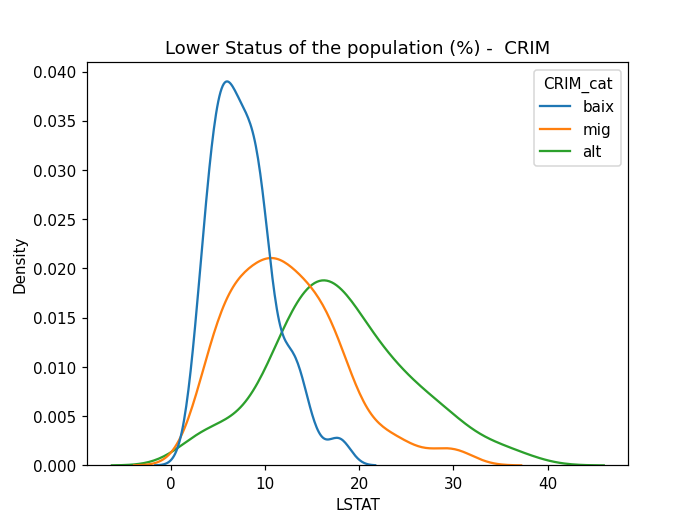

Text(0.5, 1.0, 'Lower Status of the population (%) -  CRIM')

In [20]:
fig, ax = plt.subplots()

sns.kdeplot(data=df, x='LSTAT', hue='CRIM_cat')
plt.title('Lower Status of the population (%) -  CRIM')

<IPython.core.display.Javascript object>


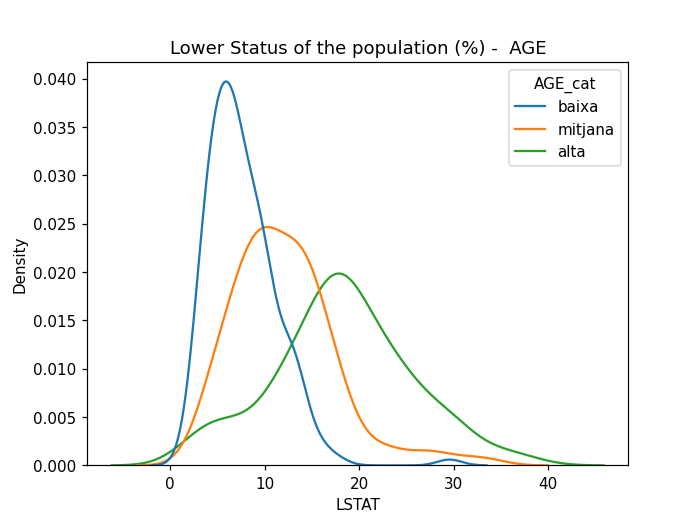

Text(0.5, 1.0, 'Lower Status of the population (%) -  AGE')

In [21]:
fig, ax = plt.subplots()

sns.kdeplot(data=df, x='LSTAT', hue='AGE_cat')

plt.title('Lower Status of the population (%) -  AGE')

<IPython.core.display.Javascript object>


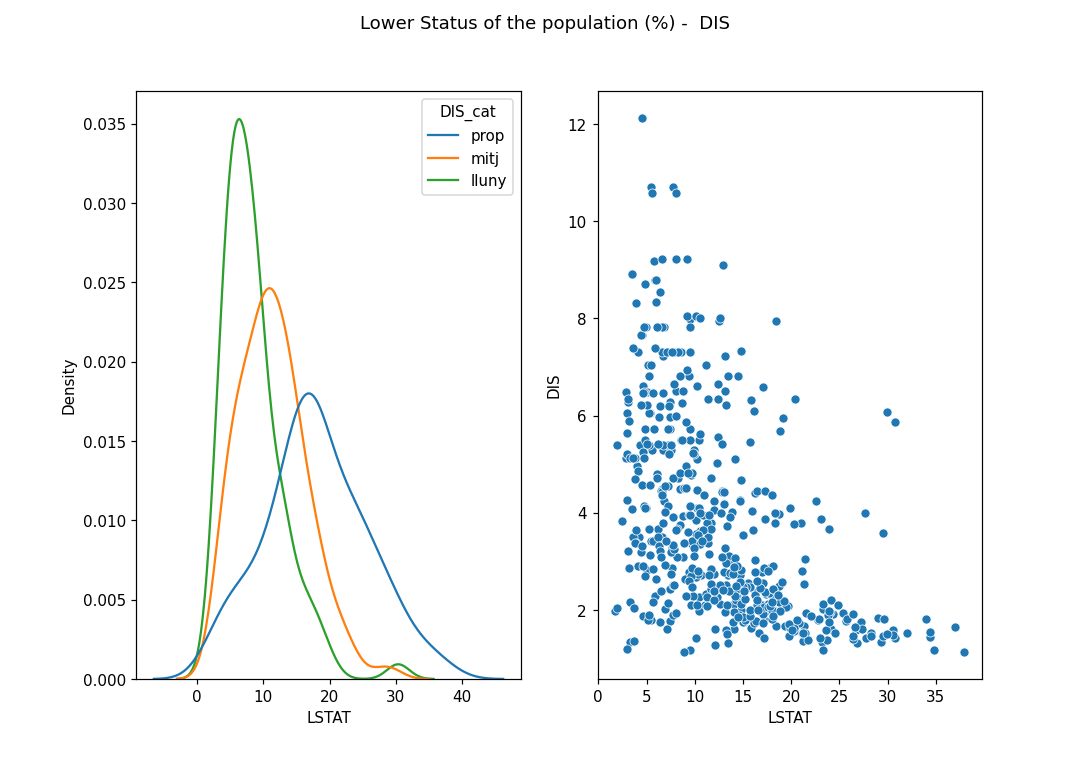

<Axes: xlabel='LSTAT', ylabel='DIS'>

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,7))

sns.kdeplot(data=df, x='LSTAT', hue='DIS_cat', ax=ax[0])
plt.suptitle('Lower Status of the population (%) -  DIS')
sns.scatterplot(data=df, x='LSTAT', y='DIS')


En els tres gràfics anteriors, mostrem el percentatge de la població considerada classe baixa separant per colors les categories generades. En el primer gràfic, observem que, quant la classe baixa està per sota del 10% le criminalitat és baixa. A mida que va augmentant el percentatge de classe baixa, la criminalitat es classifica de mitja a alta amb pics més baixos. També és interessant que la amplitud de la curva augmenta amb criminalitats mitjes i altes indicant que els percentatges de criminalitats més altes, tot i ser minoritaris, s'estenent a tots els percentatges de població de classe baixa amb un pic ben marcat pròxim al 20%.

El mateix exercici entre LSTAT i AGE ens mostra un gràfic semblant al LSTAT i CRIM, el que indica la relació directe entre CRIM i AGE, o sigui, en zones on hi ha constuccions més antigues hi ha més criminalitat. Una altre lectura anàlogue és que la població considerada classe baixa, viu en zones en construccions més velles o que regions més noves hi ha menys percentatge de població de classe baixa.

Finalment mostrem LSTAT en relació a la distància ponderada a cinc centres econòmics i de feina de Boston (DIS). Veiem que la població amb menys percentatge de classe baixa, viu més lluny d'aquest centres de feina i a mesura que augmenta aquest percentatge la distància es redueix. Per això la criminalitat també té una correlació negativa amb la distància com havíem observat. 

Finalment, en l'ũtim gràfic s'ha incluit un *scatter plot* entre LSTAT i DIS mostrant clarament que hi ha una relació forta però no línear. D'aquí la importància de analitzar curosament les relacions més enllà de la linearitat.

En el gràfic a seguir, mostrem la relació entre LSTAT i AGE com ja havíem fet però incluint les categories de criminalitat alt, mitja i baixa.

Sembla clara la relació de l'alta criminalitat amb la proporció de vivendes construides abans de 1940 (part alta del gràfic). En aquest gràfic també veiem que la amb proporcions de vivendes més noves, el percentatge de població de classe baixa també disminueix dràsticament.

<IPython.core.display.Javascript object>


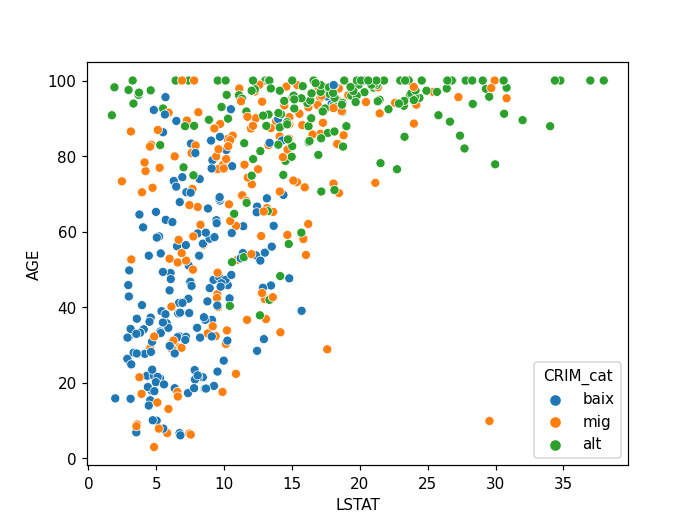

0.6023385287262398


In [23]:
fig, ax = plt.subplots()

sns.scatterplot(df, x='LSTAT', y='AGE', hue='CRIM_cat')
print(df['AGE'].corr(df['LSTAT']))

En el dos gràfics a seguir, analitzem l'index B que indica la proporció de negres per poble amb l'index de criminalitat i amb la proporció de vivendes més antigues.
Recordem que quant més baix és B més alt la proporció de negres per poble. Veiem una distribució molt estreta per B aproximadament igual a 400 i criminalitat baixa. De la mateixa forma, amb l'índex de criminalitat mitja, la distribució és una mica més ampla però centrada encara en B prop de 400. La distribució de criminalitat més alta està molt repartida amb els l'índex B amb pics baixos prop de B igual a 0 i de 350. 

En el segón gràfic LSTAT vs AGE i ĩndex de criminalitat veiem una gran concentració a la dreta (índex B alts) ón l'índex de criminalitat, com havíem vist, està distribuit per la proporció de vivendes velles. L'altre conclusió important és que la criminalitat alta està ben distribuida a la part alta del gràfic, incluint totes les faixes d'índex B en vivendes antigues.

<IPython.core.display.Javascript object>


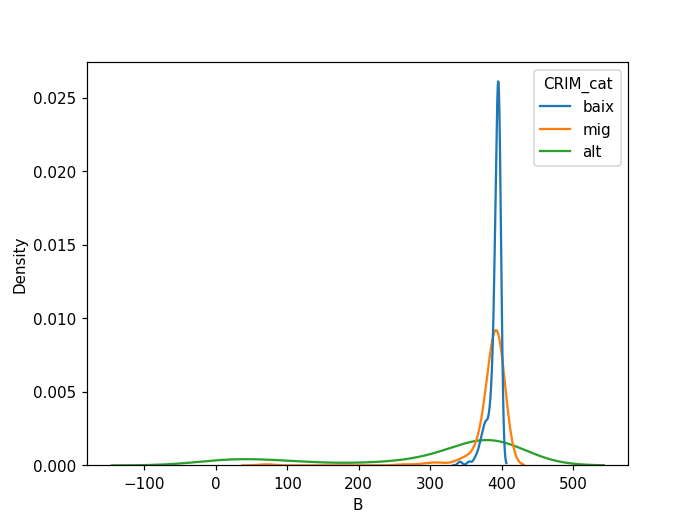

<Axes: xlabel='B', ylabel='Density'>

In [24]:
fig, ax = plt.subplots()

sns.kdeplot(data=df, x='B', hue='CRIM_cat')

<IPython.core.display.Javascript object>


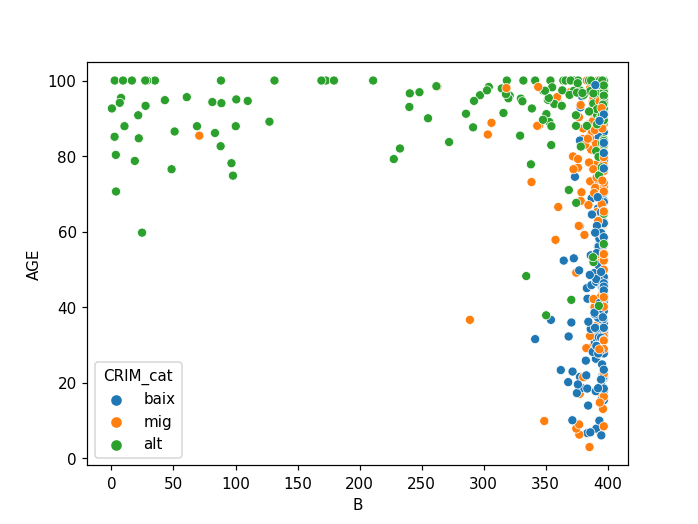

-0.27353397663851325


In [25]:
fig, ax = plt.subplots()

sns.scatterplot(df, x='B', y='AGE', hue='CRIM_cat')
print(df['AGE'].corr(df['B']))

Per concluir, veiem que un anàlisis ràpid d'aquestes dades ens dónen una fotografia clara d'aquest part de les afores de Boston on la part més adinerada de la població viu en vivendes més noves, més allunyat dels centres de treball on hi ha menys contaminació i menys criminalitat. Per altra banda, quant més ens apropem als centres de treball, on hi ha vivendes més antigues, l'índex de criminalitat créix. 
En relació a la població, tot i que molt minoritària, sembla que hi ha certs guetos, amb percentatges alts de població negre, alta criminalitat i vivendes, probablament més precàries.

Les relacions entre riquesa, indústria, proximitat als centres de treball, contaminació, índex de criminalitat i de població de classe baixa queda molt ben dibuixada  a través de les dades analitzades.